# Basic Usage (Solutions)

<div class="alert alert-block alert-info"> This notebook illutrates how to produce figures showing the time evolution of correlators in the simplest massless $\dot{\varphi}^3$ theory. </div>

In [1]:
# Import the standard Python packages
import numpy as np
import matplotlib.pyplot as plt

# For Latex-style labels
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Import CosmoFlow modules (they must be located in the same parent folder as this notebook)
from Parameters import parameters
from Theory import theory
from Solver import solver

In [2]:
# Define the numerical i\epsilon prescription
def adiabatic(N_load, DeltaN):
    return (np.tanh((N_load + DeltaN - 1)/0.1) + 1)/2

#### Theory and Numerical Parameters

In [3]:
n = 10000 # Number of points for the parameter evaluation
N_load = np.linspace(-10, 20, n) # Time grid array in e-folds for the parameters
DeltaN = 4 # Number of e-folds before horizon crossing

# Theory 
g_load = 1 * np.ones(n) * adiabatic(N_load, DeltaN) # Cubic coupling constant
H_load = np.ones(n) # Hubble scale

# Load the parameters and define continuous functions
param = parameters(N_load, H_load, g_load) # Load the class parameters
interpolated = param.output() # Define list with continuous parameters

# Numerical parameters
Nspan = np.linspace(-10, 20, 1000) # Time span in e-folds for the numerical integration
Nfield = 1 # Number of fields
Rtol, Atol = 1e-4, 1e-180 # Relative and absolute tolerance of the integrator
N_exit = 0 # Horizon exit for a mode
Ni, Nf = N_exit - DeltaN, 10 # Sets initial and final time for integration
N = np.linspace(Ni, Nf, 1000) # Define the time array for output correlators

# Initialise the integrator
theo = theory(N = Nspan, Nfield = Nfield, interpolated = interpolated)

#### Kinematic configuration

In [4]:
k = theo.k_mode(N_exit) # Mode corresponding to N = 0 horizon exit
k1, k2, k3 = k, k, k # Kinematic configuration for 3-pt function (here equilateral)

#### Solve flow equations

In [5]:
s = solver(Nspan = N, Nfield = Nfield, interpolated = interpolated, Rtol = Rtol, Atol = Atol)
f = s.f_solution(k1 = k1, k2 = k2, k3 = k3)

## Figure: Time Dependence of Correlators

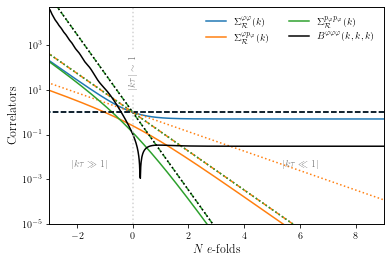

In [28]:
# Define figure
fig = plt.figure()
ax = fig.add_subplot()

# Axis limits
ax.set_xlim([Ni+1, Nf-1])
ax.set_ylim([1e-5, 5e4])

# Axis ticks
ax.set_xticks([-2, 0, 2, 4, 6, 8])
ax.set_yticks([1e-4, 1e-2, 1, 1e2, 1e4])

# Horizon crossing
axx = ax.twinx()
axx.get_yaxis().set_visible(False)
axx.axvline(x = N_exit, ls = "dotted", color = "lightgray")
axx.text(N_exit, 0.7, "$|k\\tau|\sim 1$", ha = 'center', va = 'center', rotation = 'vertical', backgroundcolor = 'white', color = "gray")
axx.text(.07, .25, "$|k\\tau \gg 1|$", ha = 'left', va = 'bottom', transform = ax.transAxes, color = "gray")
axx.text(.7, .25, "$|k\\tau \ll 1|$", ha = 'left', va = 'bottom', transform = ax.transAxes, color = "gray")

# field-field correlator
ax.semilogy(N, np.abs(f[0][0, 0]), label = "$\Sigma^{\\varphi\\varphi}_{\mathcal{R}}(k)$", color = "C0")
ax.semilogy(N, np.exp(-0*N), ls = "--", color = "C0")
ax.semilogy(N, np.exp(-2*N), ls = "dotted", color = "C0")

# field-momentum correlator
ax.semilogy(N, np.abs(f[0][0, 1]), label = "$\Sigma^{\\varphi p_\\varphi}_{\mathcal{R}}(k)$", color = "C1")
ax.semilogy(N, np.exp(-2*N), ls = "--", color = "C1")
ax.semilogy(N, np.exp(-1*N), ls = "dotted", color = "C1")

# momentum-momentum correlator
ax.semilogy(N, np.abs(f[0][1, 1]), label = "$\Sigma^{p_\\varphi p_\\varphi}_{\mathcal{R}}(k)$", color = "C2")
ax.semilogy(N, np.exp(-4*N), ls = "--", color = "C2")
ax.semilogy(N, np.exp(-2*N), ls = "dotted", color = "C2")

# field-field-field correlator
ax.semilogy(N, np.abs(f[6][0, 0, 0]), label = "$B^{\\varphi\\varphi\\varphi}(k, k, k)$", color = "k")
ax.semilogy(N, np.exp(0*N), ls = "--", color = "k")
ax.semilogy(N, np.exp(-4*N), ls = "dotted", color = "k")


# Labels
ax.set_xlabel(r"$N$ $e$-folds", fontsize = 12)
ax.set_ylabel(r"Correlators", fontsize = 12)
ax.legend(frameon = False, ncol = 2, loc = 1)

## Figure: 2-pt Correlators Phase Space

Text(0.5, 0, '$\\Sigma^{p_\\varphi p_\\varphi}_{\\mathcal{R}}(k)$')

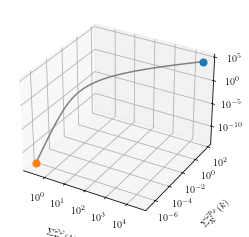

In [7]:
from mpl_toolkits import mplot3d
import matplotlib.ticker as mticker

fig = plt.figure()
ax = plt.axes(projection = "3d")

# Log-scale axis
def log_tick_formatter(val, pos = None):
    return f"$10^{{{int(val)}}}$"

ax.xaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))
ax.zaxis.set_major_formatter(mticker.FuncFormatter(log_tick_formatter))

# 2-pt Correlator Phase space
ax.plot3D(np.log(np.abs(f[0][0, 0][100:500])), np.log(np.abs(f[0][0, 1][100:500])), np.log(np.abs(f[0][1, 1][100:500])), "gray")
xdata, ydata, zdata = [np.log(np.abs(f[0][0, 0][100:500][0])), np.log(np.abs(f[0][0, 0][100:500][-1]))], [np.log(np.abs(f[0][0, 1][100:500][0])), np.log(np.abs(f[0][0, 1][100:500][-1]))], [np.log(np.abs(f[0][1, 1][100:500][0])), np.log(np.abs(f[0][1, 1][100:500][-1]))]
ax.scatter3D(xdata[0], ydata[0], zdata[0], color = "C0", marker = "o", s = 50)
ax.scatter3D(xdata[1], ydata[1], zdata[1], color = "C1", marker = "o", s = 50);

# Labels 
ax.set_xlabel(r"$\Sigma^{\varphi\varphi}_{\mathcal{R}}(k)$", labelpad = 12)
ax.set_ylabel(r"$\Sigma^{\varphi p_\varphi}_{\mathcal{R}}(k)$", labelpad = 12)
ax.set_zlabel(r"$\Sigma^{p_\varphi p_\varphi}_{\mathcal{R}}(k)$", labelpad = 12)